In [1]:
import numpy as np

In [2]:
nt = 1000
tspan = np.linspace(0, 30, nt)

def theta(x):
    eta = 10
    return 0.5 + 0.5*np.tanh(x*eta)

def windows(x,a,b):
    return theta(x-a) - theta(x-b)

pspan = windows(tspan, 2,3) +\
        windows(tspan, 6,10) 
pspan = 0.01*np.sin(2*np.pi*tspan/(60*10)) + pspan

pspan = pspan + 0.01*np.random.randn(len(tspan)) + 0.5

import datetime

date0 = datetime.datetime(2020, 1, 1, 0, 0, 0)
date0_stamp = date0.timestamp()


datestamp_span = date0_stamp + tspan

# stamp to datetime 
date_span = [datetime.datetime.fromtimestamp(ts) for ts in datestamp_span]




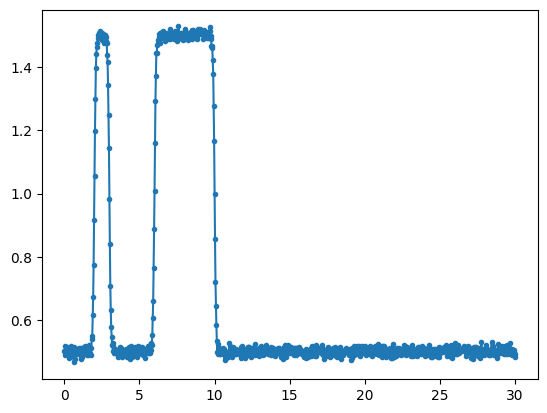

In [3]:
from matplotlib import pyplot as plt

plt.plot(tspan, pspan,marker='.')

In [4]:
from loadsavejson.savejson import savejson

In [5]:
json_data = {"pspan":pspan.tolist(), 
             "tspan":tspan.tolist() }
savejson(json_data,"frontend/src/data.json")

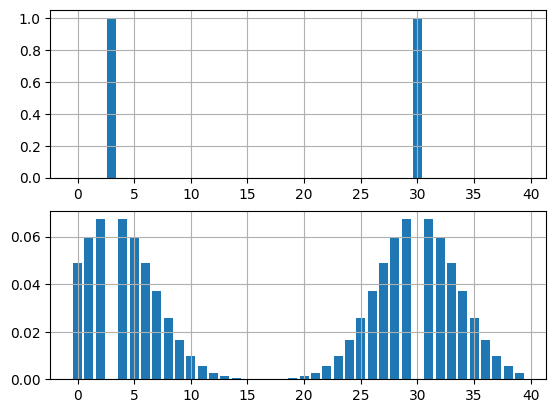

In [6]:



def computedistribution(spiras):


    if np.sum(spiras) == len(spiras):
        return np.ones(len(spiras))/len(spiras)
    
    xspan = np.arange(0,len(spiras))
    sigma = 5

    if np.sum(spiras) == 0:
        mid = len(spiras)//2
        pro =  np.exp( - (xspan - xspan[mid])**2/sigma**2)
        pro = pro/np.sum(pro)
        return pro


    xpeeks = [ int(x) for x in xspan if spiras[x] > 0.5]
    dist = [ np.exp( -(xspan - xp)**2/sigma**2) 
            for xp in xpeeks]
    dist = np.sum(dist, axis=0)

    dist[spiras == 1] = 0
    # normalize
    dist = dist/np.sum(dist)

    return dist

nslots = 40

spiras = np.zeros(nslots)
spiras[3] = 1
spiras[30] = 1
# spiras[7] = 1

plt.subplot(2,1,1)
# bars 
plt.bar(np.arange(0,nslots),spiras)
plt.grid()
plt.subplot(2,1,2)
plt.bar(np.arange(0,nslots),computedistribution(spiras))
plt.grid()

In [7]:
N = 10 
nslots = 60

spiras = np.zeros(nslots)

rotura_prob = 0.01

spiras_list = []
for i in range(nt):
    if np.random.rand() < rotura_prob:
        distribution = computedistribution(spiras)

        idx = np.random.choice(nslots, 1, p=distribution)
        spiras[idx] = 1
 
    spiras_list.append(spiras.copy())


In [8]:
spiras_list

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.

In [9]:
import pandas as pd

df = pd.DataFrame({"pspan":pspan, "date_span":date_span, "tspan":tspan})
df

long_time = tspan[-1] - tspan[0]

def get_measurements():
    now = datetime.datetime.now().timestamp()
    now_mod = np.mod(now, long_time)

    idx = np.argmin(np.abs(tspan - now_mod))

    print("today is ", datetime.datetime.fromtimestamp(now))
    print("now_mod is ",now_mod)
    print("idx is ", idx)
    print("spi",spiras_list[idx].tolist())
    print("=====================================")
    return {
        "data":df.iloc[idx],
        "espiras": spiras_list[idx].tolist()
    }




In [10]:
now = datetime.datetime.now().timestamp()
# 
now_mod = np.mod(now, long_time)
now_mod

np.float64(13.232876062393188)

In [11]:
import time
for i in range(10):

    r = get_measurements()

    time.sleep(0.1)

today is  2024-10-17 15:30:13.236347
now_mod is  13.236346960067749
idx is  441
spi [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
today is  2024-10-17 15:30:13.336742
now_mod is  13.336741924285889
idx is  444
spi [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
today is  2024-10-17 15:30:13.437320
now_mod is  13.437319993972778
idx is  447
spi [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [12]:
r = get_measurements()


today is  2024-10-17 15:30:14.245067
now_mod is  14.24506688117981
idx is  474
spi [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [13]:
spiras_list = r["espiras"]

In [14]:
spiras_list

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [15]:
# detect the changes 
spiras_list = 0*np.array(spiras_list)
diff = np.diff(spiras_list) != 0
arange = np.arange(1,len(spiras_list))

arrage =  arange[diff] - 1
arange = np.concatenate([[0],arange[diff], [len(spiras_list)]])
BreakDistributionList = arange/len(spiras_list)*100
BreakDistributionList

array([  0., 100.])

In [16]:
from valiente.profile import profile

In [17]:
import json
from matplotlib import pyplot as plt

params = json.load(open("valiente/pipes.json"))
params_value = {k: v["value"] for k,v in params.items()}

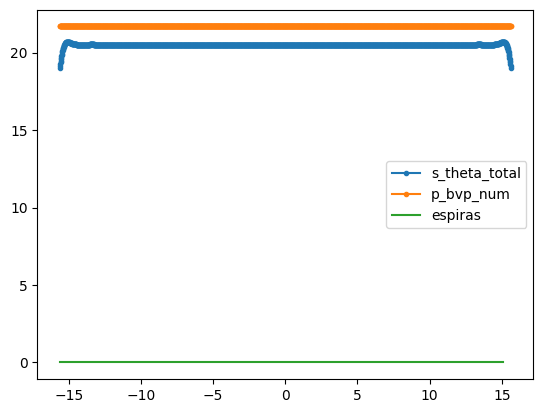

In [18]:
N = 100
type_run = True
preassure = 5
r = profile(params_value,preassure, BreakDistributionList)

plt.plot(r["z_span"],
    r["s_theta_total"],marker='.',label="s_theta_total")

plt.plot(r["z_span"],
    r["p_bvp_num"],marker='.',label="p_bvp_num")

arange = np.arange(0,len(spiras_list))
z0 = r["z_span"][0]
zf = r["z_span"][-1]
arange_norm = z0 + arange/len(spiras_list)*(zf-z0)
spiras_list_plot = [ 200*x for x in spiras_list]
plt.plot(arange_norm,spiras_list_plot,label="espiras")
plt.legend()

In [19]:
arange_norm

array([-15.625     , -15.10416667, -14.58333333, -14.0625    ,
       -13.54166667, -13.02083333, -12.5       , -11.97916667,
       -11.45833333, -10.9375    , -10.41666667,  -9.89583333,
        -9.375     ,  -8.85416667,  -8.33333333,  -7.8125    ,
        -7.29166667,  -6.77083333,  -6.25      ,  -5.72916667,
        -5.20833333,  -4.6875    ,  -4.16666667,  -3.64583333,
        -3.125     ,  -2.60416667,  -2.08333333,  -1.5625    ,
        -1.04166667,  -0.52083333,   0.        ,   0.52083333,
         1.04166667,   1.5625    ,   2.08333333,   2.60416667,
         3.125     ,   3.64583333,   4.16666667,   4.6875    ,
         5.20833333,   5.72916667,   6.25      ,   6.77083333,
         7.29166667,   7.8125    ,   8.33333333,   8.85416667,
         9.375     ,   9.89583333,  10.41666667,  10.9375    ,
        11.45833333,  11.97916667,  12.5       ,  13.02083333,
        13.54166667,  14.0625    ,  14.58333333,  15.10416667])